# Phase 2

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from eli5 import show_weights
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
import lightgbm as ltb
from sklearn.model_selection import cross_val_score
from sklearn.exceptions import FitFailedWarning
from sklearn.model_selection import GridSearchCV
from numpy import mean
from numpy import std

In [67]:
df = pd.read_csv("/home/shakiba/Downloads/data_mining/project/archive/heartRisk.csv")

In [68]:
df

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
0,1,1,0,1,1,49,101,181,32,11.1
1,0,0,0,1,1,69,167,155,59,30.1
2,0,1,1,1,1,50,181,147,59,37.6
3,1,1,1,1,0,42,145,166,46,13.2
4,0,0,1,0,1,66,134,199,63,15.1
...,...,...,...,...,...,...,...,...,...,...
995,1,0,1,1,1,42,110,175,67,3.9
996,0,1,0,1,0,75,123,130,56,23.9
997,1,1,1,0,1,76,178,179,30,61.3
998,0,1,1,1,0,65,139,169,66,32.3


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isMale          1000 non-null   int64  
 1   isBlack         1000 non-null   int64  
 2   isSmoker        1000 non-null   int64  
 3   isDiabetic      1000 non-null   int64  
 4   isHypertensive  1000 non-null   int64  
 5   Age             1000 non-null   int64  
 6   Systolic        1000 non-null   int64  
 7   Cholesterol     1000 non-null   int64  
 8   HDL             1000 non-null   int64  
 9   Risk            1000 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 78.2 KB


In [70]:
df.isnull().sum()

isMale            0
isBlack           0
isSmoker          0
isDiabetic        0
isHypertensive    0
Age               0
Systolic          0
Cholesterol       0
HDL               0
Risk              0
dtype: int64

In [71]:
df.sort_values(by="Risk",ascending=False)

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
556,0,0,1,1,1,77,193,170,81,85.4
951,0,0,0,1,1,78,189,189,98,78.5
118,0,1,1,1,0,75,196,185,53,78.1
909,1,0,0,1,0,79,196,170,51,76.8
962,1,0,1,1,0,71,188,191,20,76.5
...,...,...,...,...,...,...,...,...,...,...
795,0,0,0,1,0,42,100,144,86,0.2
503,0,0,0,0,0,42,100,141,79,0.1
480,0,1,1,0,0,40,102,152,70,0.1
504,0,0,0,1,0,41,90,144,91,0.1


In [72]:
df.describe()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.49000,0.530000,0.516000,0.522000,0.495000,59.107000,144.249000,164.043000,59.603000,19.667000
std,0.50015,0.499349,0.499994,0.499766,0.500225,11.536492,31.774528,20.329891,23.863505,17.043941
min,0.00000,0.000000,0.000000,0.000000,0.000000,40.000000,90.000000,130.000000,20.000000,0.100000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,49.000000,117.000000,146.000000,39.000000,6.300000
50%,0.00000,1.000000,1.000000,1.000000,0.000000,59.000000,144.000000,164.000000,59.000000,14.400000
75%,1.00000,1.000000,1.000000,1.000000,1.000000,69.000000,171.000000,182.000000,81.000000,29.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,79.000000,200.000000,200.000000,100.000000,85.400000


In [73]:
df["Risk"].describe()

count    1000.000000
mean       19.667000
std        17.043941
min         0.100000
25%         6.300000
50%        14.400000
75%        29.000000
max        85.400000
Name: Risk, dtype: float64

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

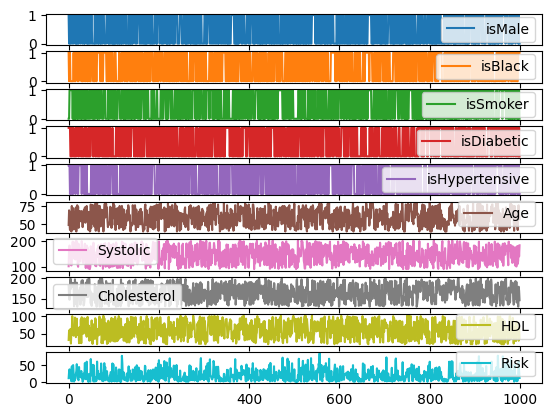

In [74]:
df.plot(subplots=True)

# Detect noisy data and delete them

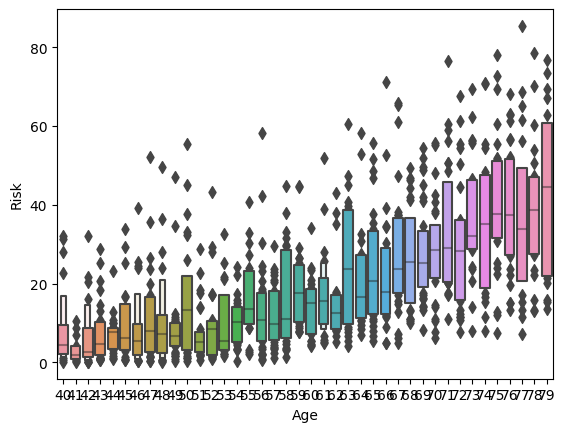

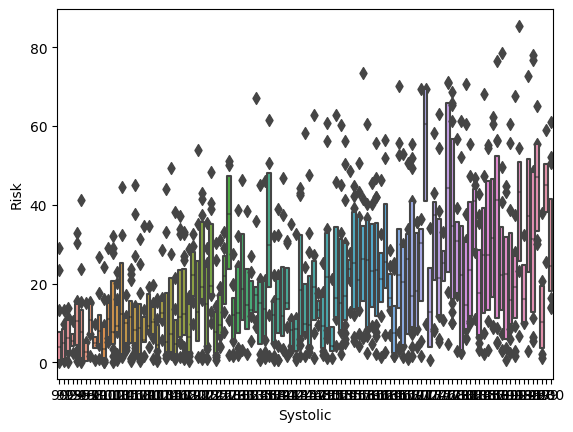

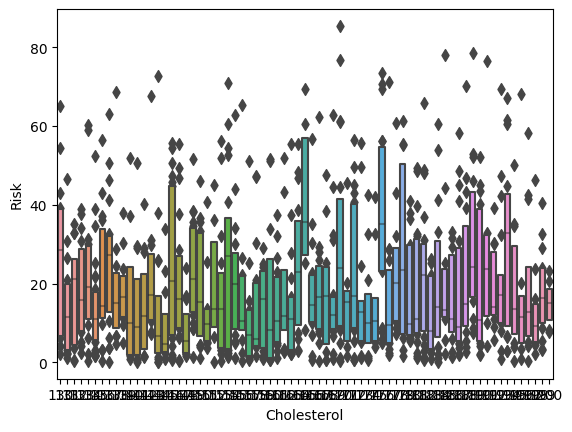

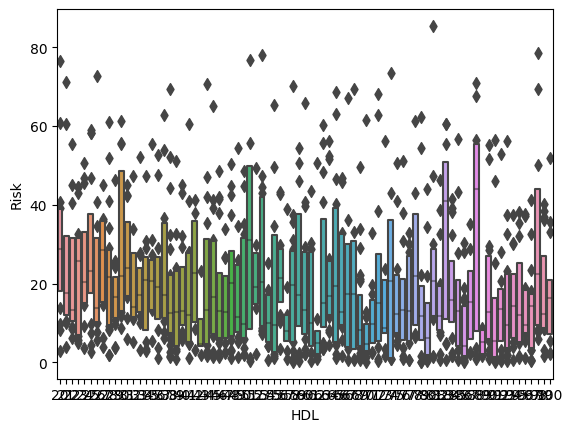

In [75]:
sns.boxenplot(x="Age", y="Risk", data=df)
plt.show()
sns.boxenplot(x="Systolic", y="Risk", data=df)
plt.show()
sns.boxenplot(x="Cholesterol", y="Risk", data=df)
plt.show()
sns.boxenplot(x="HDL", y="Risk", data=df)
plt.show()

In [76]:
df = df[df["Risk"] < df["Risk"].quantile(0.955)]
df = df[df["Risk"] > df["Risk"].quantile(0.015)]

<Axes: xlabel='isSmoker', ylabel='count'>

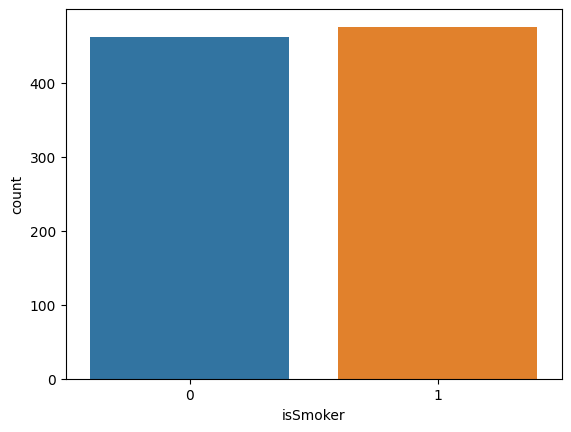

In [77]:
sns.countplot(x = 'isSmoker', data = df)

<Axes: xlabel='isMale', ylabel='count'>

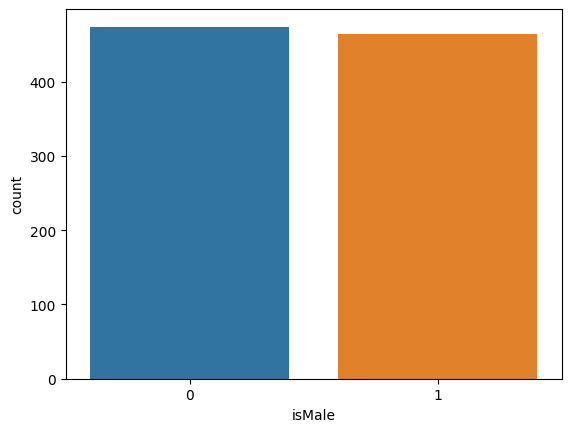

In [78]:
sns.countplot(x = 'isMale', data = df)

<Axes: xlabel='isBlack', ylabel='count'>

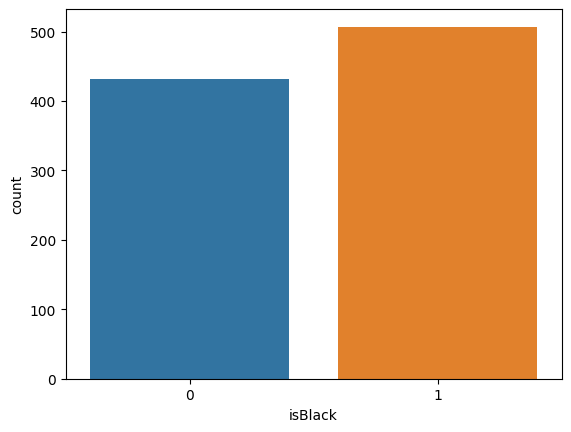

In [79]:
sns.countplot(x = 'isBlack', data = df)

<Axes: xlabel='isDiabetic', ylabel='count'>

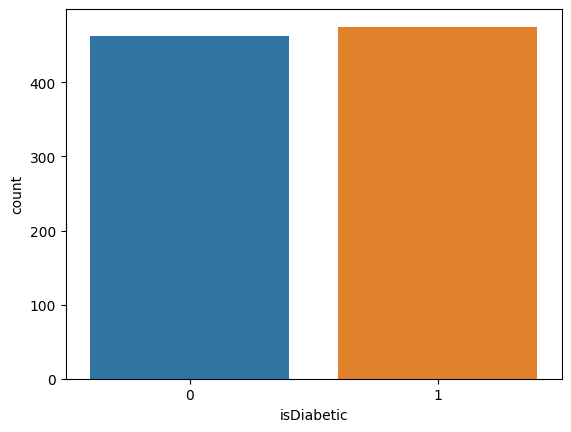

In [80]:
sns.countplot(x = 'isDiabetic', data = df)

<Axes: xlabel='isHypertensive', ylabel='count'>

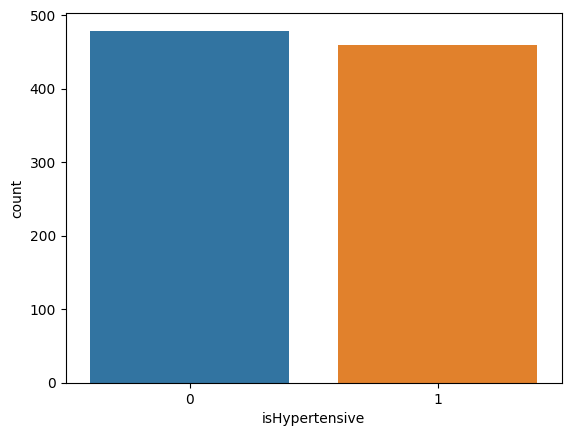

In [81]:
sns.countplot(x = 'isHypertensive', data = df)

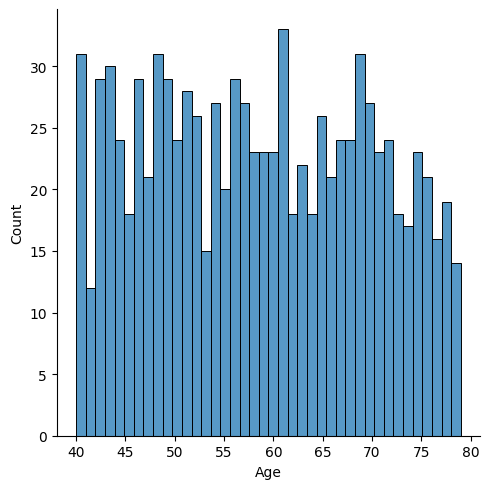

In [82]:
sns.displot(x = 'Age', data = df, bins = 40)

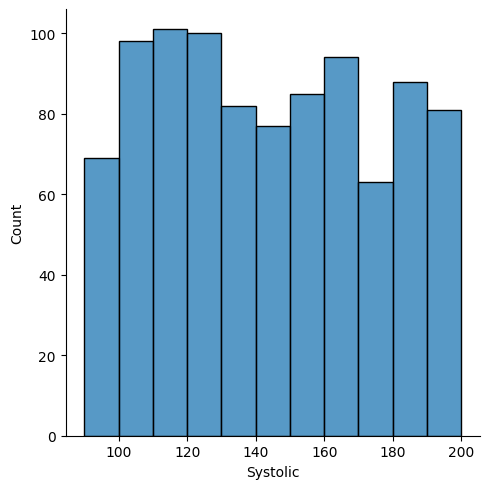

In [83]:
sns.displot(x = 'Systolic', data = df)

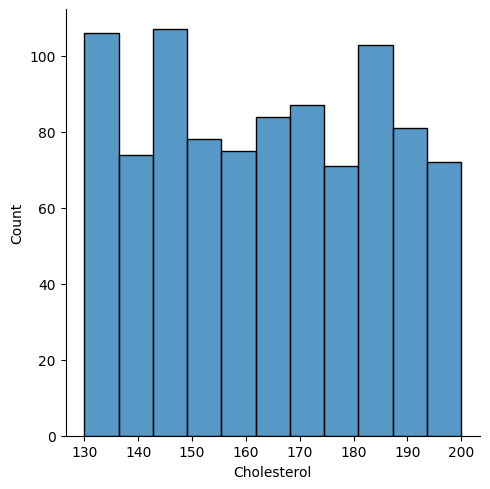

In [84]:
sns.displot(x = 'Cholesterol', data = df)

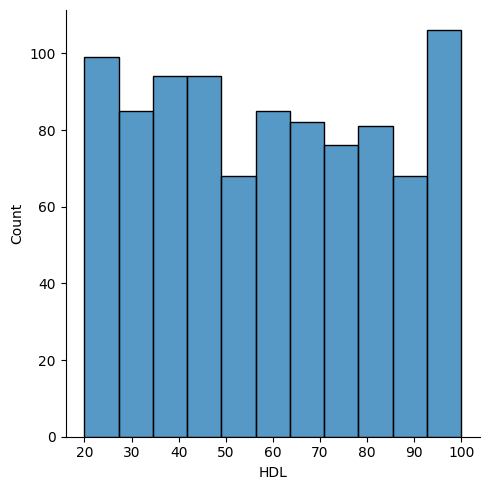

In [85]:
sns.displot(x = 'HDL', data = df)

# According to charts we don't need standardazation

# Systolic

In [86]:
def Systolic_splitter(x):
    if x < 120: return 'normal_pressure'
    elif x >= 120 and x <= 139 : return 'elevated_pressure'
    else: return 'high_pressure'

In [87]:
df["SplitedSystolic"] = df["Systolic"].apply(Systolic_splitter)

In [88]:
df

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk,SplitedSystolic
0,1,1,0,1,1,49,101,181,32,11.1,normal_pressure
1,0,0,0,1,1,69,167,155,59,30.1,high_pressure
2,0,1,1,1,1,50,181,147,59,37.6,high_pressure
3,1,1,1,1,0,42,145,166,46,13.2,high_pressure
4,0,0,1,0,1,66,134,199,63,15.1,elevated_pressure
...,...,...,...,...,...,...,...,...,...,...,...
994,1,0,0,0,0,47,179,164,58,2.8,high_pressure
995,1,0,1,1,1,42,110,175,67,3.9,normal_pressure
996,0,1,0,1,0,75,123,130,56,23.9,elevated_pressure
998,0,1,1,1,0,65,139,169,66,32.3,elevated_pressure


In [89]:
df["SplitedSystolic"].value_counts()

high_pressure        488
normal_pressure      268
elevated_pressure    182
Name: SplitedSystolic, dtype: int64

In [90]:
dummy_sus = pd.get_dummies(df.SplitedSystolic, prefix = 'Blood_pressure')
df = df.drop(['SplitedSystolic'], axis = 1)
df = pd.concat([df, dummy_sus], axis = 1)
df.head()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk,Blood_pressure_elevated_pressure,Blood_pressure_high_pressure,Blood_pressure_normal_pressure
0,1,1,0,1,1,49,101,181,32,11.1,0,0,1
1,0,0,0,1,1,69,167,155,59,30.1,0,1,0
2,0,1,1,1,1,50,181,147,59,37.6,0,1,0
3,1,1,1,1,0,42,145,166,46,13.2,0,1,0
4,0,0,1,0,1,66,134,199,63,15.1,1,0,0


<Axes: >

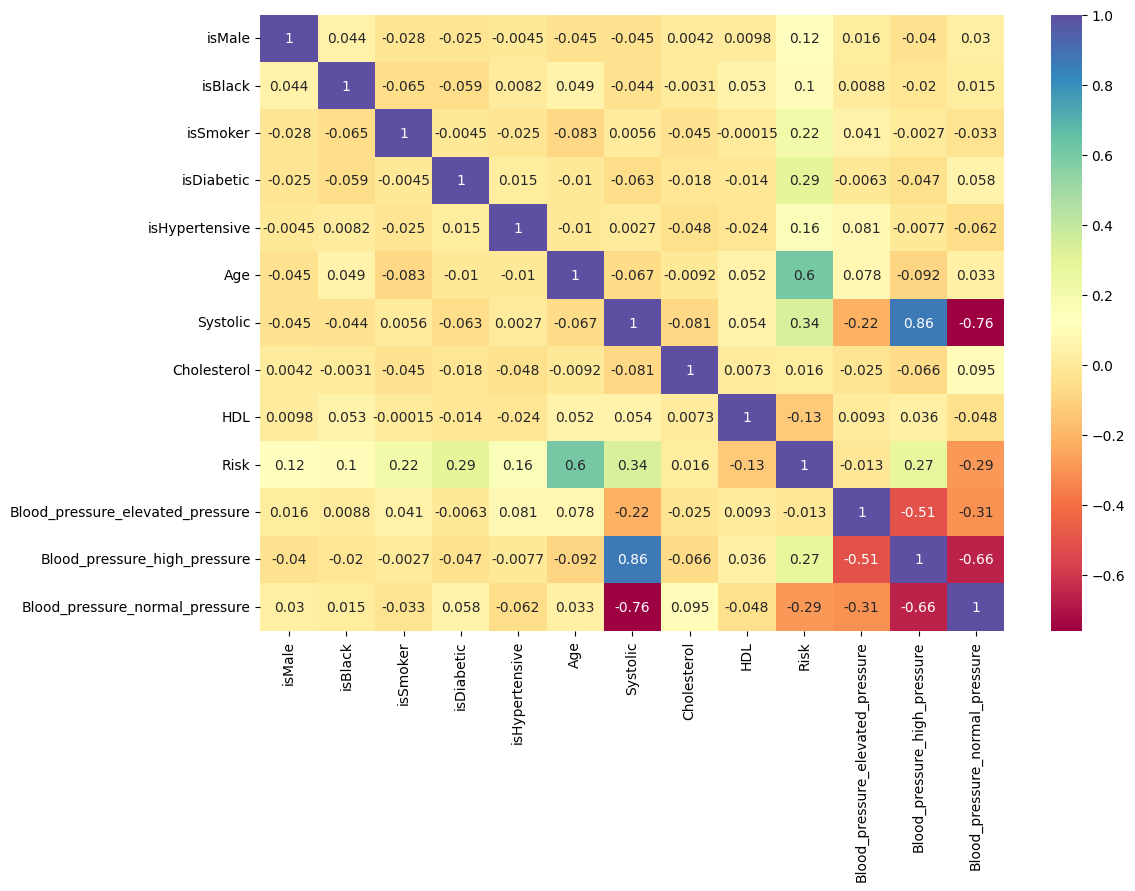

In [91]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True, cmap = 'Spectral')

# Phase 4

In [92]:
# data split
X = df.drop('Risk', axis = 1)
y = df['Risk']

# Here correlations in order of greatest to least risk

In [93]:
def permImp(x, y):
    model = RandomForestRegressor().fit(x, y)
    perm = PermutationImportance(model).fit(x, y)
    return show_weights(perm, feature_names = x.columns.tolist())

In [94]:
permImp(X, y)

Weight,Feature
1.0870 ± 0.1003,Age
0.4566 ± 0.0266,Systolic
0.2741 ± 0.0158,isDiabetic
0.1439 ± 0.0176,isSmoker
0.1286 ± 0.0109,HDL
0.0818 ± 0.0238,isBlack
0.0305 ± 0.0022,Cholesterol
0.0271 ± 0.0046,isHypertensive
0.0256 ± 0.0036,isMale
0.0021 ± 0.0006,Blood_pressure_normal_pressure


In [95]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# A higher Shannon entropy value indicates a more balanced dataset

In [96]:
# Assume that y is a list or array containing the class labels of your dataset
unique_labels, counts = np.unique(y, return_counts=True)
proportions = counts / len(y)

# Calculate Shannon entropy
shannon_entropy = -np.sum(proportions * np.log(proportions))

print(f'Shannon entropy: {shannon_entropy:.2f}')

Shannon entropy: 5.79


# Phase 5

In [97]:
def report(xt, yt, xtest, ytest, pred, model):
    print(' REPORT '.center(60, '='))
    print()
    print(f'Testing RMSE :===> {np.sqrt(mean_squared_error(ytest, pred))}')
    print()
    print(f'Testing MAE :===> {mean_absolute_error(ytest, pred)}')
    print()
    print(f"Testing R2 :===> {r2_score(ytest, pred)}")
    print()
    return pd.DataFrame({
        'actual value' : ytest.values,
        'predicted value' : pred
    }).head(10)

def get_score(xt, yt, xtest, ytest, model, scaler = None, predict = True):
    if scaler:
        model = Pipeline(steps = [('scaler', scaler), ('model', model)])
    
    model.fit(xt, yt)
    pred = model.predict(xtest)
    return report(xt, yt, xtest, ytest, pred, model)

## Create a baseline

In [98]:
clf = DummyRegressor(strategy='mean')
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
get_score(X_train, y_train, X_test, y_test, DummyRegressor(), StandardScaler())

========================== REPORT ==========================

Testing RMSE :===> 14.358411438930888

Testing MAE :===> 11.647604220723059

Testing R2 :===> -0.0034879954080058173



,actual value,predicted value
0,26.7,17.527591
1,8.3,17.527591
2,3.1,17.527591
3,19.7,17.527591
4,7.2,17.527591
5,22.0,17.527591
6,33.1,17.527591
7,17.6,17.527591
8,11.6,17.527591
9,23.7,17.527591


# Cross_Validation

In [99]:
cv = KFold(n_splits = 10, shuffle=True, random_state = 0)

In [100]:
score = []
lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor(n_estimators=100)
xgbr = XGBRegressor()
lasso = Lasso()
lgbm = ltb.LGBMRegressor()


scores = []
score = cross_val_score(lr, X_train,y_train, scoring='r2', cv=cv, n_jobs=-1)
scores.append(score) 
print('Accuracy of LinearRegression: %.3f ' % (mean(scores)))
print()
score = cross_val_score(dtr, X_train,y_train, scoring='r2', cv=cv, n_jobs=-1)
print('Accuracy of DecisionTreeRegressor: %.3f ' % (mean(scores)))
print()
scores.append(score) 
scores.append(score) 
score = cross_val_score(rfr, X_train,y_train, scoring='r2', cv=cv, n_jobs=-1)
print('Accuracy of RandomForestRegressor: %.3f ' % (mean(scores)))
print()
scores.append(score) 
score = cross_val_score(xgbr, X_train,y_train, scoring='r2', cv=cv, n_jobs=-1)
print('Accuracy of XGBRegressor: %.3f ' % (mean(scores)))
print()
scores.append(score) 
score = cross_val_score(lasso, X_train,y_train, scoring='r2', cv=cv, n_jobs=-1)
print('Accuracy of Lasso: %.3f ' % (mean(scores)))
print()
scores.append(score) 
score = cross_val_score(lgbm, X_train,y_train, scoring='r2', cv=cv, n_jobs=-1)
print('Accuracy of LGBMRegressor: %.3f' % (mean(scores)))
print()
scores.append(score) 


Accuracy of LinearRegression: 0.786 

Accuracy of DecisionTreeRegressor: 0.786 

Accuracy of RandomForestRegressor: 0.667 

Accuracy of XGBRegressor: 0.703 

Accuracy of Lasso: 0.735 

Accuracy of LGBMRegressor: 0.726



In [101]:
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
get_score(X_train, y_train, X_test, y_test, LinearRegression(), StandardScaler())

========================== REPORT ==========================

Testing RMSE :===> 6.345395494611044

Testing MAE :===> 4.71832303957073

Testing R2 :===> 0.8040177291406189



,actual value,predicted value
0,26.7,30.567260
1,8.3,11.354180
2,3.1,7.752335
3,19.7,21.187033
4,7.2,14.124315
5,22.0,26.069557
6,33.1,26.632927
7,17.6,16.625012
8,11.6,9.619149
9,23.7,24.991126


# Finding DecisionTreeRegressor hyper parameters

In [102]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

tuning_model=GridSearchCV(dtr,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        

from datetime import datetime

start_time=timer(None)

tuning_model.fit(X_train,y_train)

timer(start_time)

tuning_model.best_params_

'parameters={"splitter":["best","random"],\n            "max_depth" : [1,3,5,7,9,11,12],\n           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],\n           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],\n           "max_features":["auto","log2","sqrt",None],\n           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }\n\ntuning_model=GridSearchCV(dtr,param_grid=parameters,scoring=\'neg_mean_squared_error\',cv=3,verbose=3)\n\ndef timer(start_time=None):\n    if not start_time:\n        start_time=datetime.now()\n        return start_time\n    elif start_time:\n        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)\n        tmin,tsec=divmod(temp_sec,60)\n        \n\nfrom datetime import datetime\n\nstart_time=timer(None)\n\ntuning_model.fit(X_train,y_train)\n\ntimer(start_time)\n\ntuning_model.best_params_'

In [103]:
dtr_hyper= DecisionTreeRegressor(max_depth=12,max_features='auto'
                                         ,max_leaf_nodes=70
                                         ,min_samples_leaf=3
                                 ,min_weight_fraction_leaf=0.1
                                 ,splitter='random')
dtr_hyper.fit(X_train, y_train)
dtr_pred = dtr_hyper.predict(X_test)
get_score(X_train, y_train, X_test, y_test, DecisionTreeRegressor(), StandardScaler())

========================== REPORT ==========================

Testing RMSE :===> 8.559108208997788

Testing MAE :===> 6.0492907801418445

Testing R2 :===> 0.64342045393922



/home/shakiba/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


,actual value,predicted value
0,26.7,25.3
1,8.3,11.3
2,3.1,1.7
3,19.7,8.7
4,7.2,15.4
5,22.0,14.6
6,33.1,30.4
7,17.6,23.7
8,11.6,12.7
9,23.7,19.4
